# <p style="color:#141414;text-align:center;font-family:cursive;font-weight: bold;font-size:170%">Credit Card Fraud Detection</p>

<img src="https://www.cardexpert.in/wp-content/uploads/2020/06/credit-card-fraudulent-transaction-1024x567.jpg" width="570" height="300">

# <p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">1- Import Libraries </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("C:\\Users\\Maryam\\Desktop\\ML Projects\\Credit Card Fraud\\fraudTrain.csv")
test_data = pd.read_csv("C:\\Users\\Maryam\\Desktop\\ML Projects\\Credit Card Fraud\\fraudTest.csv")

# <p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">2- Data Preprocessing </p>

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Shape of training data </p>

In [3]:
print("Rows :",train_data.shape[0])
print("Columns :",train_data.shape[1])

Rows : 1296675
Columns : 23


<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Shape of testing data </p>

In [4]:
print("Rows :",test_data.shape[0])
print("Columns :",test_data.shape[1])

Rows : 555719
Columns : 23


<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Training data </p>

In [5]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Testing data </p>

In [6]:
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [7]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Check for missing values in training data</p>

In [8]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Check for missing values in testing data</p>

In [9]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
train_data.city.nunique()

894

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Droping unnecessary columns from Training and Testing data </p>

In [12]:
column = ['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'street', 'state', 'city_pop', 'trans_num',
          'unix_time', 'trans_date_trans_time', 'city']
train_data.drop(columns=column, inplace=True)
test_data.drop(columns=column, inplace=True)

In [13]:
print(train_data.shape)
print(test_data.shape)

(1296675, 11)
(555719, 11)


In [14]:
train_data.head()

,category,amt,gender,zip,lat,long,job,dob,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,28654,36.0788,-81.1781,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,grocery_pos,107.23,F,99160,48.8878,-118.2105,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,entertainment,220.11,M,83252,42.1808,-112.2620,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,gas_transport,45.00,M,59632,46.2306,-112.1138,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,misc_pos,41.96,M,24433,38.4207,-79.4629,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [15]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   category    1296675 non-null  object        
 1   amt         1296675 non-null  float64       
 2   gender      1296675 non-null  object        
 3   zip         1296675 non-null  int64         
 4   lat         1296675 non-null  float64       
 5   long        1296675 non-null  float64       
 6   job         1296675 non-null  object        
 7   dob         1296675 non-null  datetime64[ns]
 8   merch_lat   1296675 non-null  float64       
 9   merch_long  1296675 non-null  float64       
 10  is_fraud    1296675 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 108.8+ MB


In [17]:
#creating `age` column from `dob` column
from datetime import datetime

current_date = datetime.now()
year = current_date.year
train_data['age'] = year - train_data['dob'].dt.year
test_data['age'] = year - train_data['dob'].dt.year

In [18]:
train_data['age']

0          35
1          45
2          61
3          56
4          37
           ..
1296670    62
1296671    44
1296672    56
1296673    43
1296674    28
Name: age, Length: 1296675, dtype: int64

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Droping `DOB` column</p>

In [19]:
train_data.drop(columns='dob',inplace=True)
test_data.drop(columns='dob',inplace=True)

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Label Encoding</p>

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data['gender'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender'] = label_encoder.fit_transform(test_data['gender'])

***

# <p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">3- Data Exploration </p>

In [21]:
valid = train_data[train_data['is_fraud'] == 0]
fraud = train_data[train_data['is_fraud'] == 1]

print('Total Genuine Transactions: ', len(valid))
print('Total Fraud Transactions: ', len(fraud))

Total Genuine Transactions:  1289169
Total Fraud Transactions:  7506


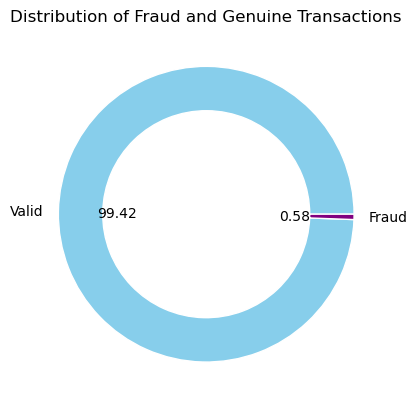

In [67]:
plt.pie(train_data.is_fraud.value_counts(), labels=['Valid','Fraud'], autopct='%.02f',
        wedgeprops=dict(width=.3, edgecolor='w'),colors=['skyblue','purple'])
plt.title('Distribution of Fraud and Genuine Transactions')
plt.show()

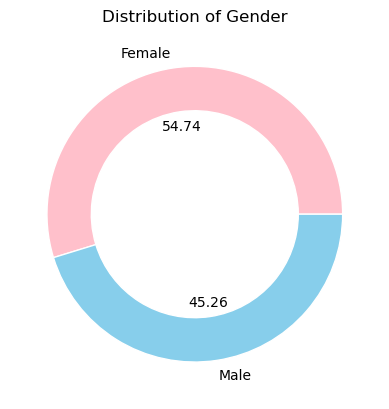

In [68]:
plt.pie(train_data.gender.value_counts(), labels=['Female','Male'], autopct='%.02f',
        wedgeprops=dict(width=.3, edgecolor='w'),colors=['pink','skyblue'])
plt.title("Distribution of Gender")
plt.show()

In [24]:
train_data.head()

,category,amt,gender,zip,lat,long,job,merch_lat,merch_long,is_fraud,age
0,misc_net,4.97,F,28654,36.0788,-81.1781,"Psychologist, counselling",36.011293,-82.048315,0,35
1,grocery_pos,107.23,F,99160,48.8878,-118.2105,Special educational needs teacher,49.159047,-118.186462,0,45
2,entertainment,220.11,M,83252,42.1808,-112.2620,Nature conservation officer,43.150704,-112.154481,0,61
3,gas_transport,45.00,M,59632,46.2306,-112.1138,Patent attorney,47.034331,-112.561071,0,56
4,misc_pos,41.96,M,24433,38.4207,-79.4629,Dance movement psychotherapist,38.674999,-78.632459,0,37


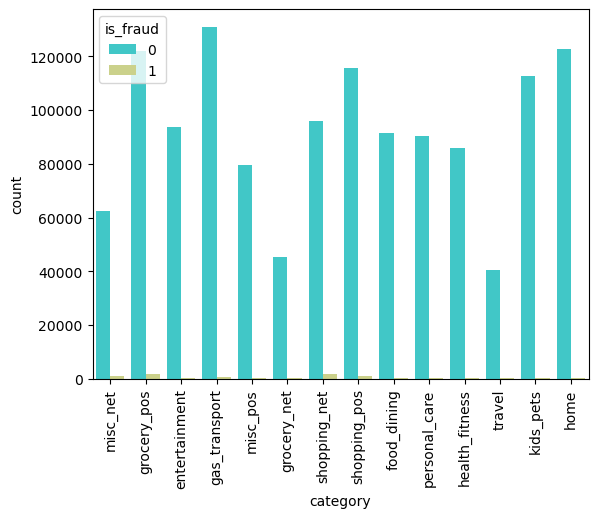

In [25]:
sns.countplot(x=train_data['category'], hue=train_data['is_fraud'], palette='rainbow')
plt.xticks(rotation = 90)
plt.show()

In [26]:
job = train_data.job.value_counts(ascending=False)
job =job.head(20)

<Axes: xlabel='age', ylabel='Count'>

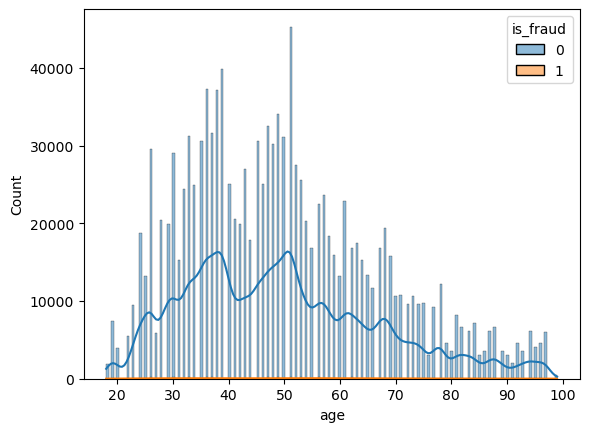

In [27]:
sns.histplot(x= train_data['age'], hue=train_data['is_fraud'], kde= True)

In [28]:
train_data.amt.nunique()

52928

In [29]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [30]:
valid.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [31]:
valid.amt.max()

28948.9

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   zip         1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   job         1296675 non-null  object 
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
 9   is_fraud    1296675 non-null  int64  
 10  age         1296675 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 108.8+ MB


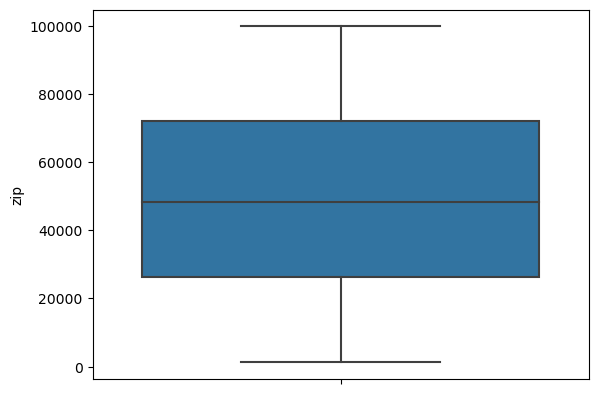

In [69]:
sns.boxplot(y = train_data['zip'])
plt.show()

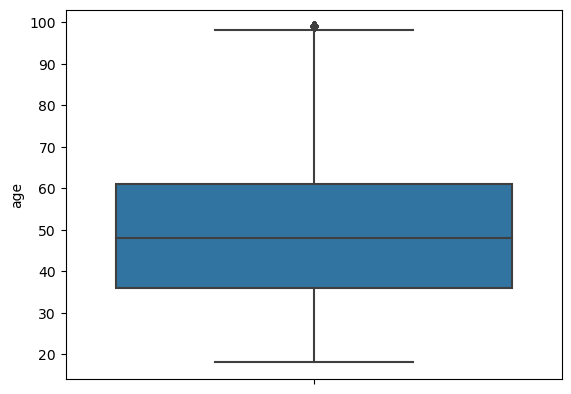

In [70]:
sns.boxplot(y = train_data.age)
plt.show()

In [36]:
train_data.drop(columns=['job','category'], inplace=True)
test_data.drop(columns=['job','category'], inplace=True)

In [37]:
print(train_data.shape)
print(test_data.shape)

(1296675, 9)
(555719, 9)


In [38]:
print(train_data.columns)
print(test_data.columns)

Index(['amt', 'gender', 'zip', 'lat', 'long', 'merch_lat', 'merch_long',
       'is_fraud', 'age'],
      dtype='object')
Index(['amt', 'gender', 'zip', 'lat', 'long', 'merch_lat', 'merch_long',
       'is_fraud', 'age'],
      dtype='object')


In [39]:
print(train_data[['amt','lat','long','merch_lat','merch_long']].dtypes)
print(test_data[['amt','lat','long','merch_lat','merch_long']].dtypes)

amt           float64
lat           float64
long          float64
merch_lat     float64
merch_long    float64
dtype: object
amt           float64
lat           float64
long          float64
merch_lat     float64
merch_long    float64
dtype: object


In [40]:
#from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
#scaler = StandardScaler()

# Fit and transform the scaler on the training data
#train_data[['amt','lat','long','merch_lat','merch_long']] = scaler.fit_transform(train_data[['amt','lat','long','merch_lat','merch_long']])

# Transform the test data using the same scaler
#test_data[['amt','lat','long','merch_lat','merch_long']] = scaler.fit_transform(test_data[['amt','lat','long','merch_lat','merch_long']])


In [41]:
train_data.select_dtypes(include=['float'])

,amt,lat,long,merch_lat,merch_long
0,4.97,36.0788,-81.1781,36.011293,-82.048315
1,107.23,48.8878,-118.2105,49.159047,-118.186462
2,220.11,42.1808,-112.2620,43.150704,-112.154481
3,45.00,46.2306,-112.1138,47.034331,-112.561071
4,41.96,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,36.841266,-111.690765
1296671,51.70,39.2667,-77.5101,38.906881,-78.246528
1296672,105.93,32.9396,-105.8189,33.619513,-105.130529
1296673,74.90,43.3526,-102.5411,42.788940,-103.241160


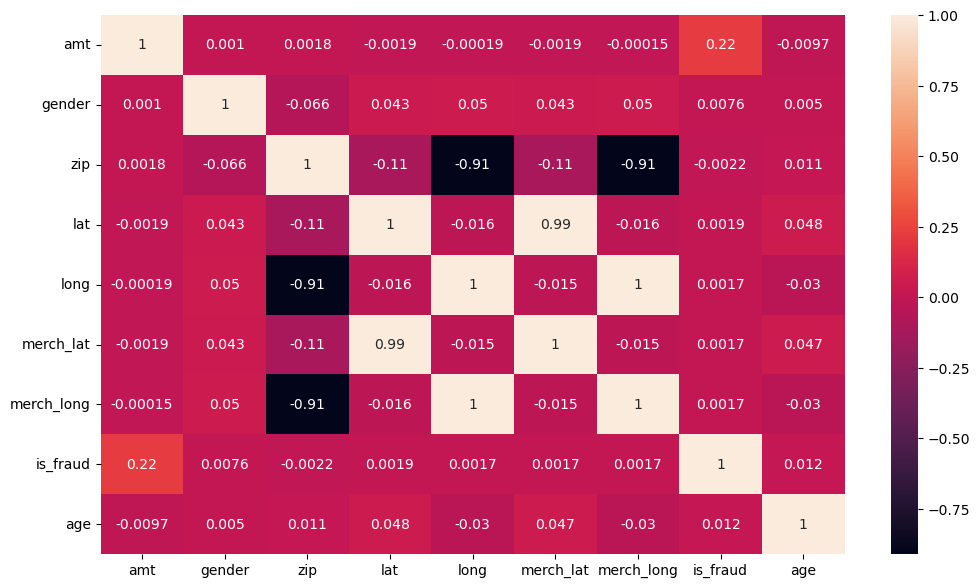

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(train_data.corr(), fmt='.2g', annot=True);

***

# <p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">4- Model Building 💻 </p>

<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Split training and testing data </p>

In [43]:
from sklearn.model_selection import train_test_split
# training data
X_train = train_data.drop('is_fraud', axis=1)

y_train = train_data['is_fraud']

#testing data
X_test = test_data.drop('is_fraud', axis=1)

y_test = test_data['is_fraud']


<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%"> Logistic Regression</p>

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter= 1000, random_state=0)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
print("Logistic Regression's Accuracy :", lr_accuracy)
print("Logistic Regression's Precision :", lr_precision)

Logistic Regression's Accuracy : 0.9955049224518147
Logistic Regression's Precision : 0.0


In [75]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Random Forest Classifier</p>

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500 , n_jobs = -1, 
                             max_features = 7, max_leaf_nodes = 30, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=7, max_leaf_nodes=30, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [48]:
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print("RFC Accuracy :", rfc_accuracy)

rfc_precision = precision_score(y_test, rfc_pred)
print("RFC Precision :", rfc_precision)

0.9959997768656461
0.46899841017488075


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.47      0.28      0.35      2145

    accuracy                           1.00    555719
   macro avg       0.73      0.64      0.67    555719
weighted avg       1.00      1.00      1.00    555719



<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Decision Tree Classifier</p>

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0,max_features=7 , max_leaf_nodes=30,  max_depth=8,
                               min_samples_split=3, class_weight = 'balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_features=7,
                       max_leaf_nodes=30, min_samples_split=3, random_state=0)

In [58]:
dtree_pred = dtree.predict(X_test)

dtree_accuracy = accuracy_score(y_test, dtree_pred)
print("Decision tree's Accuracy :", dtree_accuracy)


0.8862464662896176
0.02892625732798519


In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



<p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Voting Classifier</p>

In [53]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('lr', clf2), ('dtree', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Accuracy Score : ", (accuracy_score(y_test, predictions))


Final Accuracy Score 
0.9956866689819855


In [59]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
etc.fit(X_train, y_train)

ExtraTreeClassifier()

In [78]:
etc_pred = etc.predict(X_test)
print("Extra tree Accuracy Score :" ,accuracy_score(y_test, etc_pred))


Extra tree Accuracy Score : 0.9485081489025928


In [79]:
print(classification_report(y_test, etc_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.01      0.16      0.02      2145

    accuracy                           0.95    555719
   macro avg       0.50      0.55      0.50    555719
weighted avg       0.99      0.95      0.97    555719



# <p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">5- Model Evaluation </p>

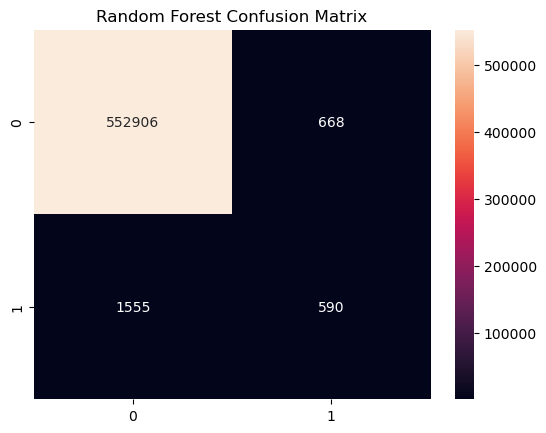

In [83]:
sns.heatmap(confusion_matrix(y_test, rfc_pred),annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

### <p style="color:#15452c;font-family:cursive;font-weight: bold;font-size:110%">Here Random Forest Perform best, data is highly imbalanced I've used multiple techniques like oversampling, undersampling and scaling.</p>